In [31]:
# TODO fix the osx.py script?
import sys
sys.path.append('/Applications/BayesDB-bayes0.1.dev20150727-262-g5df8e0c.app/Contents/MacOS/venv/lib/python2.7/site-packages')

%matplotlib inline

import bayeslite
import bayeslite.guess
import bayeslite.crosscat
import crosscat
import crosscat.LocalEngine
from bdbcontrib.facade import do_query
from bdbcontrib import plotutils
from bdbcontrib import general_utils
import matplotlib.pyplot as plt
import seaborn as sns

# TODO: content taken from http://probcomp-4.csail.mit.edu/bayeslite/tutorials/satellites/satellites.bql

In this example we will explore the core functionality of BayesDB by using BayesDB to explore and analyze some real data. The data we will use is the Union of Concerned Scientists' Satellites data. The data is a catalogue of satellites. Each row of the data represents a satellite and each column is a feature of that satellite such as dry mass, orbit type, launch date, perigee, etc.

### Creating a Table
The first thing to do is to load our data. The data are in csv format with a header of the column names. To load data in the shell, we use the `.csv` command followed by what we want the table to be named --- we will call it satellites --- followed by the path to the csv.

In [ ]:
# TODO introduce .bdb
satellites_bdb = bayeslite.bayesdb_open("satellites.bdb")
bayeslite.bayesdb_read_csv_file(satellites_bdb, "satellites", "satellites.utf8.csv", 
                                header=True, create=True, ifnotexists=True)

Now that we have a table, we can use the `.describe` command to view the columns in the table.

In [13]:
# TODO broken what's the command?
 # do_query(satellites_bdb, ".describe table satellites")

### Generating models of the data
Before we can as BayesDB any questions we need to create a generator. A generator specifies the model that we want to impose on the data. Here, we will use the default generator, crosscat. 

In [14]:
crosscat_engine = crosscat.LocalEngine.LocalEngine(seed=0)
crosscat_metamodel = bayeslite.crosscat.CrosscatMetamodel(crosscat_engine)
bayeslite.bayesdb_register_metamodel(satellites_bdb, crosscat_metamodel)
generator = bayeslite.guess.bayesdb_guess_generator(satellites_bdb, 'satellites_cc', 'satellites', 'crosscat', 
                                                    ifnotexists=True)

We can select data just as we would in SQL in BQL:

In [39]:
print do_query(satellites_bdb, "SELECT name, dry_mass_kg, period_minutes, class_of_orbit FROM satellites LIMIT 10;").as_df()

                                                Name  Dry_Mass_kg  \
0                                           AAUSat-3          NaN   
1      ABS-1 (LMI-1, Lockheed Martin-Intersputnik-1)         1730   
2           ABS-1A (Koreasat 2, Mugunghwa 2, ABS-1A)          800   
3  ABS-2i (MBSat, Mobile Broadcasting Satellite, ...         1700   
4                    ABS-7 (Koreasat 3, Mugungwha 3)         1800   
5  AcrimSat (Active Cavity Radiometer Irradiance ...           13   
6                 Advanced Orion 2 (NROL 6, USA 139)          NaN   
7                Advanced Orion 3 (NROL 19, USA 171)          NaN   
8               Advanced Orion 4 (NRO L-26, USA 202)          NaN   
9               Advanced Orion 5 (NRO L-32, USA 223)          NaN   

   Period_minutes Class_of_Orbit  
0          100.42            LEO  
1         1436.08            GEO  
2         1436.13            GEO  
3         1436.10            GEO  
4         1436.06            GEO  
5           98.60            L

We can also use visualization tools such as `.histogram` to plot emperical frequencies. In the next example, the first argument `dry_mass_kg` is a `NUMERICAL` variable is plotted in different colors based on the `class_of_orbit`.

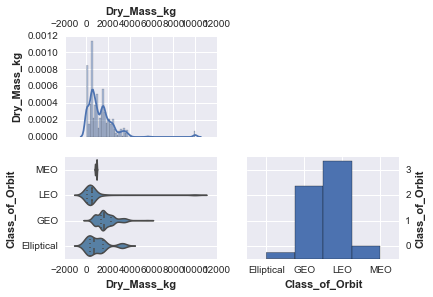

In [27]:
df = do_query(satellites_bdb, 'SELECT dry_mass_kg, class_of_orbit FROM satellites').as_df()
gs = plotutils.pairplot(df, bdb=satellites_bdb)

Finally, we need to tell BayesDB which values to treat as missing, `NULL`. Different datasets use different markers for missing data, this dataset uses `NaN`. To convert all instances of `NaN` to SQL `NULL`, we use the `.nullify` command, followed by the table, followed by the value to convert.

In [38]:
general_utils.nullify(satellites_bdb, 'satellites', float('NaN'))
print do_query(satellites_bdb, 'SELECT name, dry_mass_kg FROM satellites LIMIT 10;').as_df()

                                                Name  Dry_Mass_kg
0                                           AAUSat-3          NaN
1      ABS-1 (LMI-1, Lockheed Martin-Intersputnik-1)         1730
2           ABS-1A (Koreasat 2, Mugunghwa 2, ABS-1A)          800
3  ABS-2i (MBSat, Mobile Broadcasting Satellite, ...         1700
4                    ABS-7 (Koreasat 3, Mugungwha 3)         1800
5  AcrimSat (Active Cavity Radiometer Irradiance ...           13
6                 Advanced Orion 2 (NROL 6, USA 139)          NaN
7                Advanced Orion 3 (NROL 19, USA 171)          NaN
8               Advanced Orion 4 (NRO L-26, USA 202)          NaN
9               Advanced Orion 5 (NRO L-32, USA 223)          NaN


Notice that `NaN` entires have been replaced with `None`, which is the way Python represents SQL `NULL`.

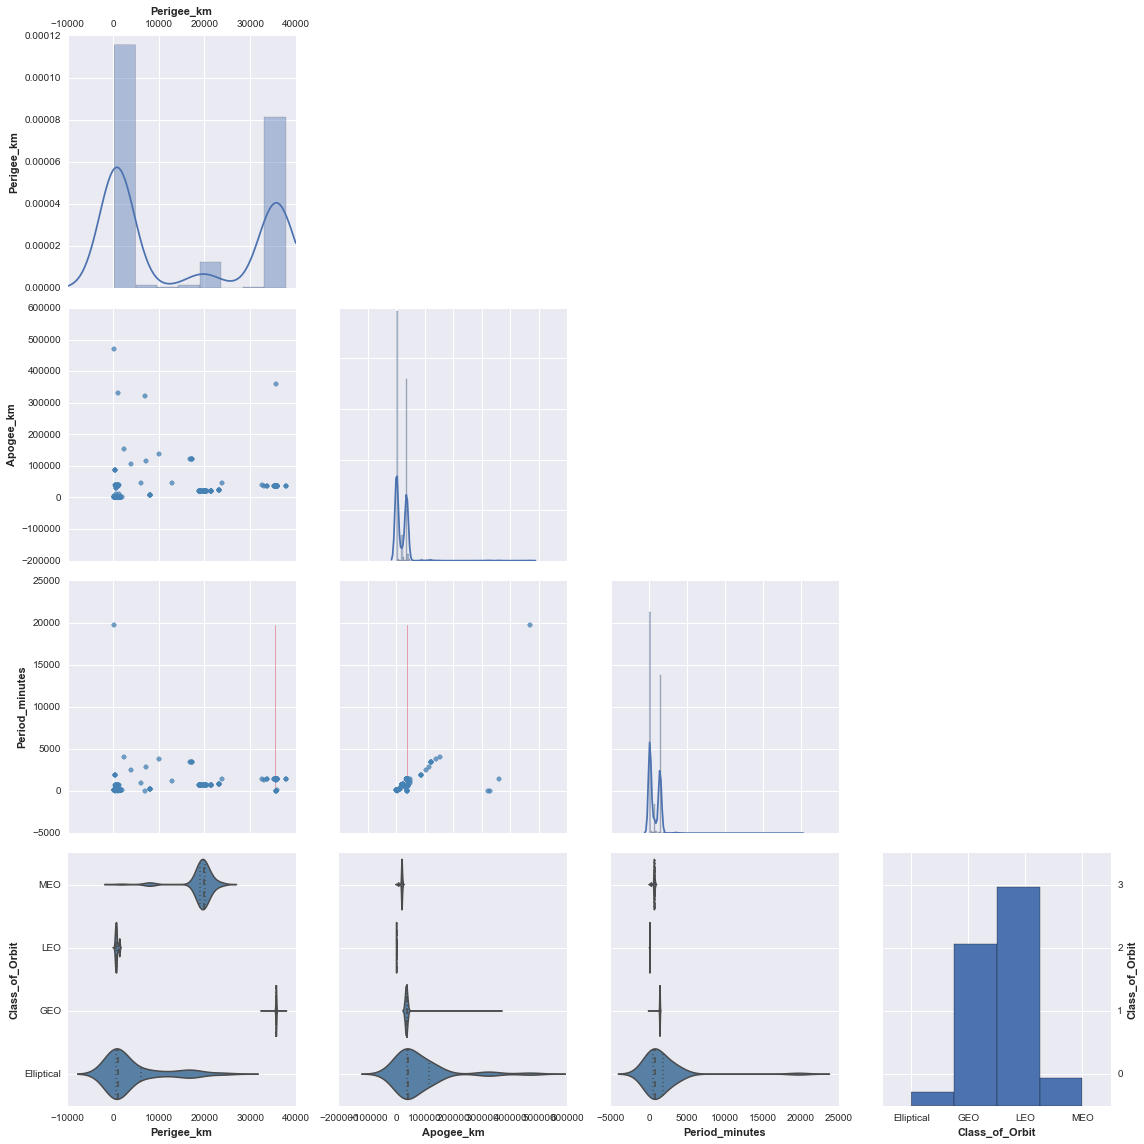

In [40]:
c = len(df.columns)*4

fig = plt.figure(tight_layout=True, figsize=(c, c))
gs = plotutils.pairplot(df, bdb=satellites_bdb, generator_name='satellites_cc',
                        use_shortname=None, show_contour=False,
                        colorby=None, show_missing=True, show_full=False)
plt.close('all')
# use plt.show() to open a separate window where you won't get a warning about tight_layout, 
# and you will have larger plots to look at.
fig

In [34]:
for row in satellites_bdb.execute("SELECT Name, dry_mass_kg FROM satellites LIMIT 10;"):
    print row

(u'AAUSat-3', u'NaN')
(u'ABS-1 (LMI-1, Lockheed Martin-Intersputnik-1)', 1730)
(u'ABS-1A (Koreasat 2, Mugunghwa 2, ABS-1A)', 800)
(u'ABS-2i (MBSat, Mobile Broadcasting Satellite, Han Byul)', 1700)
(u'ABS-7 (Koreasat 3, Mugungwha 3)', 1800)
(u'AcrimSat (Active Cavity Radiometer Irradiance Monitor)', 13)
(u'Advanced Orion 2 (NROL 6, USA 139)', u'NaN')
(u'Advanced Orion 3 (NROL 19, USA 171)', u'NaN')
(u'Advanced Orion 4 (NRO L-26, USA 202)', u'NaN')
(u'Advanced Orion 5 (NRO L-32, USA 223)', u'NaN')
